Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


ModuleNotFoundError: No module named 'seaborn'

In [2]:
df= pd.read_csv('raw_data.csv')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,27734400000000000
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,39139200000000000
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,65059200000000000
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,42163200000000000
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,47347200000000000
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,23155200000000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2.216000e+03
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,4.423735e+16
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,2.008532e+16
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000e+00
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.937600e+16
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4.432320e+16
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.927040e+16
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,9.184320e+16


In [5]:
df = df.dropna() # remove NA values
print("number of rows", len(df))

number of rows 2216


In [6]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


Feature Engineering

In [7]:
#Creating Age column
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [8]:
#Creating total amount of spending for the products
cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
df['TotalSpent'] = df[cols].sum(axis=1)

In [9]:
#Simplify Martiul Status
conditions = ["Married", "Together"]
values = "Partner"
df["Living_With"] = df["Marital_Status"].map(lambda x: values if x in conditions else "Alone")

In [10]:
#Total number of kids in the household
df["Children"] = df[["Kidhome", "Teenhome"]].sum(axis=1)

In [11]:
#Are the customers parent or not 
df["Parenthood"] = (df["Children"] > 0).astype(int)

In [12]:
#Segmenting column into three columns
education_map = {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
df["Education"] = df["Education"].map(education_map)

In [13]:
#Renaming the confusing names and dropping the excessive features
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [14]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Parenthood
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,83894400000000000,66,1617,Alone,0,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,10800000000000000,69,27,Alone,2,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,40780800000000000,58,776,Partner,0,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,5616000000000000,39,53,Partner,1,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,27734400000000000,42,422,Partner,1,1


Custom Encoding for Classification features  

In [15]:
edu_mapping = {'Graduate': 1, 'Postgraduate': 2, 'Undergraduate': 0}
liv_mapping = {'Alone': 0, 'Partner': 1}
df['Education'] = df['Education'].replace(edu_mapping)
df['Living_With'] = df['Living_With'].replace(liv_mapping)

Removing outliers

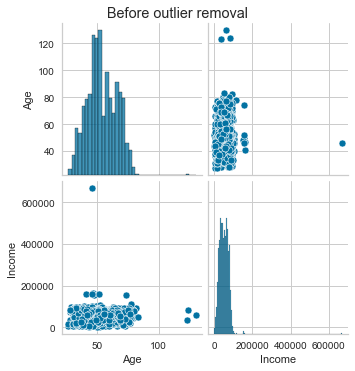

The total number of data-points after removing the outliers are: 2204


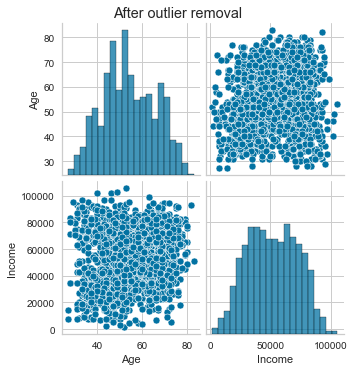

In [16]:
g1 = sns.pairplot(df[['Age','Income']])
g1.fig.suptitle('Before outlier removal', y=1.02)
plt.show()

# Rules for outliers
df = df[(df["Age"]<100)]
df = df[(df["Income"]<110000)]
print("The total number of data-points after removing the outliers are:", len(df))

g2 = sns.pairplot(df[['Age','Income']])
g2.fig.suptitle('After outlier removal', y=1.02)
plt.show()


C:\Users\hazir\AppData\Local\Temp\ipykernel_14344\1482849736.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Matrix')

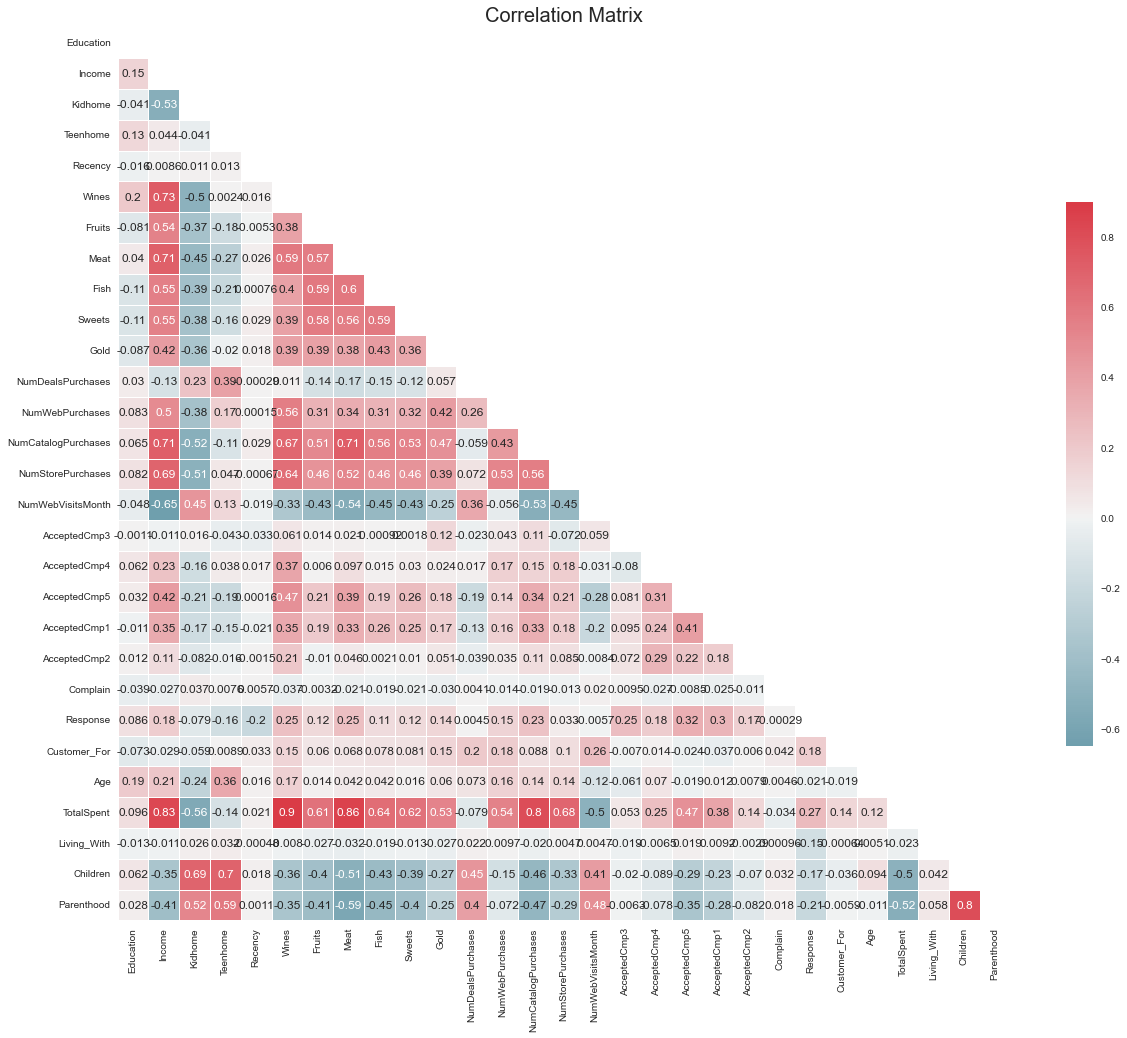

In [17]:
corrmat = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, cmap=cmap, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.title('Correlation Matrix', fontsize= 20)

In [18]:
#Checking the high collenarity
corrmat = df.corr()
high_corr = corrmat[abs(corrmat) > 0.7]
high_corr = high_corr.unstack().sort_values(ascending=False).drop_duplicates()
high_corr = high_corr[high_corr != 1.0]

for i in range(0, len(high_corr)):
    print(high_corr.index[i][0], 'and',high_corr.index[i][1], 'columns have correlation around:', round(high_corr[i], 2))


Wines and TotalSpent columns have correlation around: 0.9
Meat and TotalSpent columns have correlation around: 0.86
TotalSpent and Income columns have correlation around: 0.83
Parenthood and Children columns have correlation around: 0.8
NumCatalogPurchases and TotalSpent columns have correlation around: 0.8
Income and Wines columns have correlation around: 0.73
NumCatalogPurchases and Meat columns have correlation around: 0.71
Income and NumCatalogPurchases columns have correlation around: 0.71
Income and Meat columns have correlation around: 0.71
Education and Income columns have correlation around: nan


In [19]:
#dropping colunms
df_copy = df.copy()

drop_cols = [
    'Recency',
    'AcceptedCmp1', 
    'AcceptedCmp2', 
    'AcceptedCmp3', 
    'AcceptedCmp4',
    'AcceptedCmp5', 
    'Complain', 
    'Response'
]
df_copy = df_copy.drop(drop_cols, axis=1)
df_copy.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Age', 'TotalSpent', 'Living_With', 'Children',
       'Parenthood'],
      dtype='object')

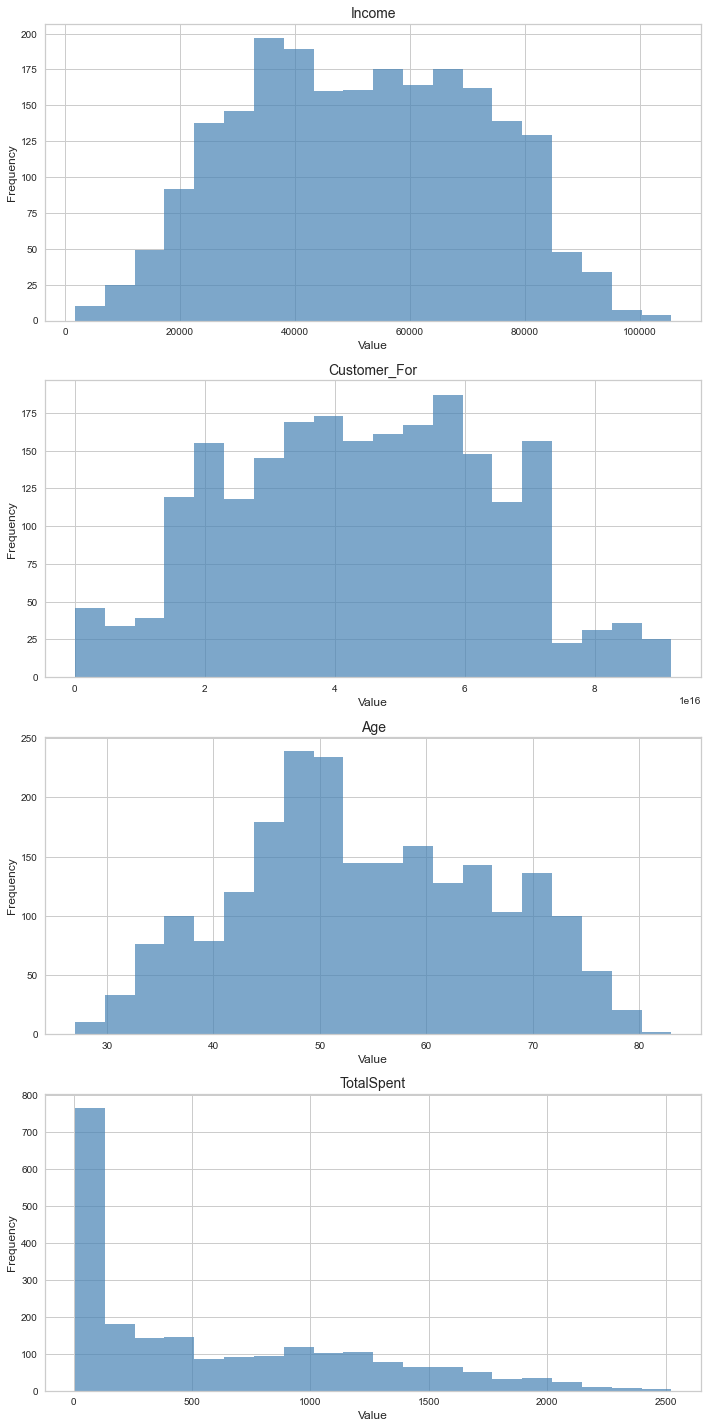

In [20]:
dist_cols = ['Income','Customer_For', 'Age', 'TotalSpent']

fig, axs = plt.subplots(nrows=len(dist_cols), figsize=(10, 20))


for i, column in enumerate(dist_cols):
    axs[i].hist(df_copy[column], bins=20, color='steelblue', alpha=0.7)
    axs[i].set_title(column, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)


plt.tight_layout()
plt.show()


In [21]:
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = pd.DataFrame(scaler.transform(df_copy),columns= df_copy.columns )

In [22]:
scaled_df.describe()

,Education,Income,Kidhome,Teenhome,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,TotalSpent,Living_With,Children,Parenthood
count,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,...,2.204000e+03,2204.000000,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03
mean,4.997011e-17,1.289551e-17,-4.835817e-18,4.513429e-17,1.450745e-17,-8.059695e-18,6.286562e-17,-4.997011e-17,1.611939e-17,-4.997011e-17,...,-2.901490e-17,0.000000,-6.528353e-17,-1.354029e-16,3.385072e-17,4.594026e-17,2.256715e-17,-3.223878e-17,3.868654e-17,-1.096119e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,...,1.000227e+00,1.000227,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.944584e+00,-2.412294e+00,-8.237186e-01,-9.311609e-01,-9.077375e-01,-6.639901e-01,-7.594962e-01,-6.890514e-01,-6.618941e-01,-8.520545e-01,...,-1.518524e+00,-0.945846,-1.798539e+00,-2.213701e+00,-2.203719e+00,-2.315990e+00,-1.000560e+00,-1.348486e+00,-1.267338e+00,-1.585923e+00
25%,-4.089828e-01,-7.935085e-01,-8.237186e-01,-9.311609e-01,-8.366123e-01,-6.137149e-01,-6.860199e-01,-6.343259e-01,-6.373993e-01,-6.780703e-01,...,-7.760222e-01,-0.945846,-8.724475e-01,-9.697994e-01,-7.409056e-01,-6.913246e-01,-8.941835e-01,-1.348486e+00,-1.267338e+00,-1.585923e+00
50%,-4.089828e-01,-1.533149e-02,-8.237186e-01,-9.311609e-01,-3.802258e-01,-4.628895e-01,-4.472216e-01,-4.701494e-01,-4.659354e-01,-3.687649e-01,...,-3.352039e-02,-0.231070,-2.550533e-01,2.741024e-01,3.408338e-03,-9.276375e-02,-3.490018e-01,7.415724e-01,6.784983e-02,6.305477e-01
75%,1.126619e+00,8.070263e-01,1.038308e+00,9.061521e-01,5.947819e-01,1.655499e-01,3.059113e-01,2.230404e-01,1.525593e-01,2.353471e-01,...,7.089815e-01,0.483706,6.710381e-01,6.887363e-01,7.477223e-01,8.478319e-01,7.318044e-01,7.415724e-01,6.784983e-02,6.305477e-01
max,1.126619e+00,2.606441e+00,2.900334e+00,2.743465e+00,3.516841e+00,4.338387e+00,7.162176e+00,4.035584e+00,4.188084e+00,5.353384e+00,...,7.762749e+00,9.061018,2.214524e+00,6.078977e+00,2.369724e+00,2.472497e+00,3.188031e+00,7.415724e-01,2.738225e+00,6.305477e-01


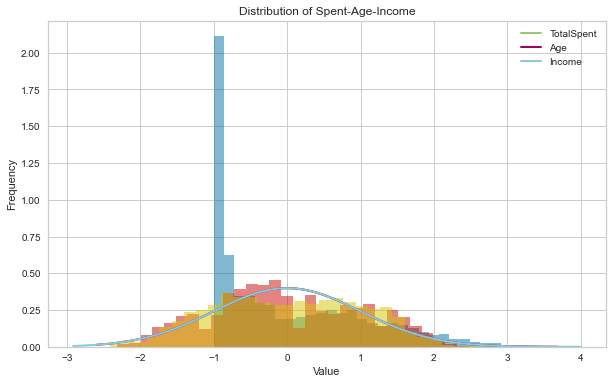

In [23]:
#all distributions are on the same line, standardisation is successful
cols = ['TotalSpent','Age','Income']

plt.figure(figsize=(10,6))
for col in cols:
    x = scaled_df[col]
    plt.hist(x, bins=30, alpha=0.5, density=True)

    mu, std = np.mean(x), np.std(x)

    # Add a normal distribution line to the plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2, label=col)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Spent-Age-Income')
plt.legend()
plt.show()


What is the silhouette score that can be obtained before performing PCA?

In [24]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=n_clusters,  metric='euclidean')

kmeans.fit(scaled_df)
hierarchical.fit(scaled_df)

kmeans_silhouette = silhouette_score(scaled_df, kmeans.labels_)
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical.labels_)

print("K-Means: Silhouette score = {:.3f}".format(kmeans_silhouette))
print("Hierarchical Clustering: Silhouette score = {:.3f}".format(hierarchical_silhouette))


K-Means: Silhouette score = 0.225
Hierarchical Clustering: Silhouette score = 0.212


SCREE PLOT

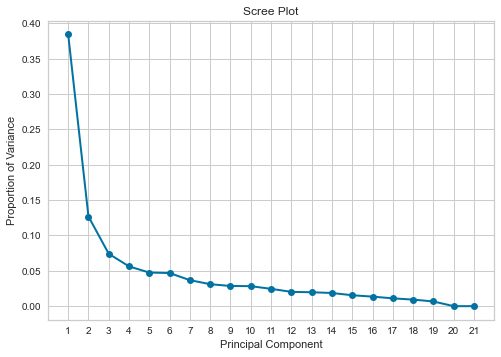

In [25]:
pca = PCA().fit(scaled_df)
variance_ratios = pca.explained_variance_ratio_
plt.plot(range(1, len(variance_ratios)+1), variance_ratios, 'bo-', linewidth=2)
plt.xticks(np.arange(1, len(variance_ratios)+1, 1.0))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.title('Scree Plot')

plt.show()

The elbow point strongly suggests that the appropriate number of components for PCA is 3

In [26]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
transformed_df = pd.DataFrame(pca.transform(scaled_df), columns=(["Feature1","Feature2","Feature3"]))

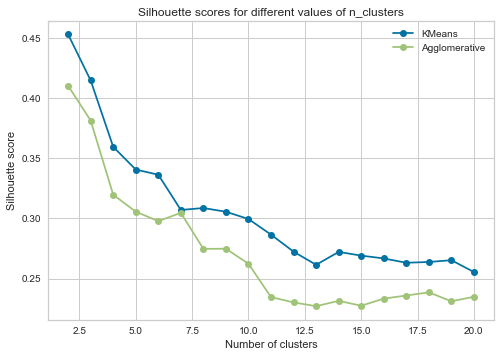

In [27]:
n_clusters_range = range(2, 21)

silhouette_scores_kmeans = []
silhouette_scores_agg = []

for n_clusters in n_clusters_range:

    #KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=42).fit(transformed_df)
    labels_kmeans = kmeans.labels_
    score_kmeans = silhouette_score(transformed_df, labels_kmeans)
    silhouette_scores_kmeans.append(score_kmeans)

    #Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean')
    labels_agg = model.fit_predict(transformed_df) #no predict functionality in agglo
    score_agg = silhouette_score(transformed_df, labels_agg)
    silhouette_scores_agg.append(score_agg)

plt.plot(n_clusters_range, silhouette_scores_kmeans, marker='o', label='KMeans')
plt.plot(n_clusters_range, silhouette_scores_agg, marker='o', label='Agglomerative')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for different values of n_clusters')
plt.legend()
plt.show()


The decision to use 4 clusters was made based on the observed distribution of the clusters, which appeared to be significantly improved compared to when using fewer clusters (i.e., 3, 2, or 1)

In [28]:
n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=42).fit(transformed_df)
score_kmeans = silhouette_score(transformed_df, kmeans.labels_)
df['Kmeans'] = kmeans.labels_

hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean').fit(transformed_df)
agg_labels = hierarchical.fit_predict(transformed_df)
score_agg = silhouette_score(transformed_df, agg_labels)
df['Agg'] = agg_labels


print("K-Means: Silhouette score = {:.3f}".format(score_kmeans))
print("Hierarchical Clustering: Silhouette score = {:.3f}".format(score_agg))

K-Means: Silhouette score = 0.360
Hierarchical Clustering: Silhouette score = 0.320


c:\Users\hazir\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


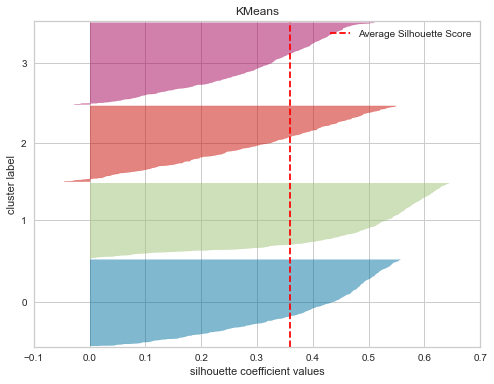

In [29]:
#Visulazing the KMeans label
fig, ax = plt.subplots(figsize=(8, 6))

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
visualizer.fit(transformed_df)
visualizer.finalize()
ax.set_title(kmeans.__class__.__name__)
plt.show()


Evaluation Metrics

In [30]:
from sklearn.metrics import pairwise_distances
import numpy as np

def davies_bouldin_index(X, labels):
    k = len(np.unique(labels))
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i], axis=0)

    # Calculate pairwise distances between centroids
    distances = pairwise_distances(centroids)

    # Calculate within-cluster scatter for each cluster
    scatter = np.zeros(k)
    for i in range(k):
        scatter[i] = np.mean(pairwise_distances(X[labels == i], [centroids[i]], metric='euclidean'))

    # Calculate Davies-Bouldin index for each cluster
    DB = np.zeros(k)
    for i in range(k):
        max_val = -1
        for j in range(k):
            if i != j:
                val = (scatter[i] + scatter[j]) / distances[i][j]
                if val > max_val:
                    max_val = val
        DB[i] = max_val

    # Calculate overall Davies-Bouldin index
    return np.mean(DB)


In [31]:
print("K-Means: Davies-Bouldin Index =", davies_bouldin_index(transformed_df, kmeans.labels_))
print("Hierarchical: Davies-Bouldin Index =", davies_bouldin_index(transformed_df, hierarchical.labels_))


K-Means: Davies-Bouldin Index = 1.0249242985243976
Hierarchical: Davies-Bouldin Index = 1.1421656119221146


In [32]:
from sklearn.metrics import calinski_harabasz_score
print("K-Means: Calinski Harabasz Index =", calinski_harabasz_score(transformed_df, kmeans.labels_))
print("Hierarchical: Calinski Harabasz Index =", calinski_harabasz_score(transformed_df, hierarchical.labels_))


K-Means: Calinski Harabasz Index = 2002.5870861818437
Hierarchical: Calinski Harabasz Index = 1711.6363669623086


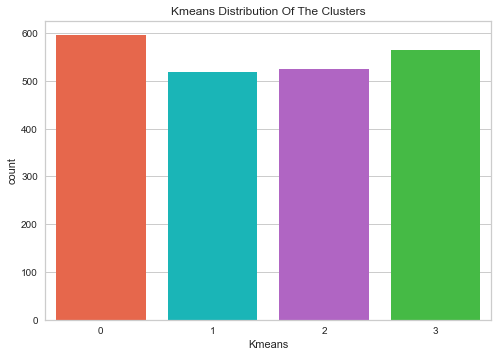

In [33]:
#Plotting countplot of clusters
pal = ["#FF5733","#00CED1","#BA55D3","#32CD32"]
pl = sns.countplot(x=df["Kmeans"], palette= pal)
pl.set_title("Kmeans Distribution Of The Clusters")
plt.show()

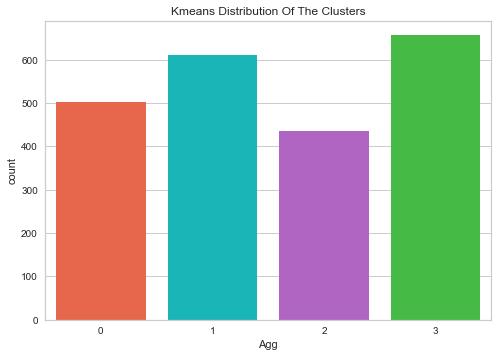

In [34]:
#Plotting countplot of clusters
pal = ["#FF5733","#00CED1","#BA55D3","#32CD32"]
pl = sns.countplot(x=df["Agg"], palette= pal)
pl.set_title("Kmeans Distribution Of The Clusters")
plt.show()

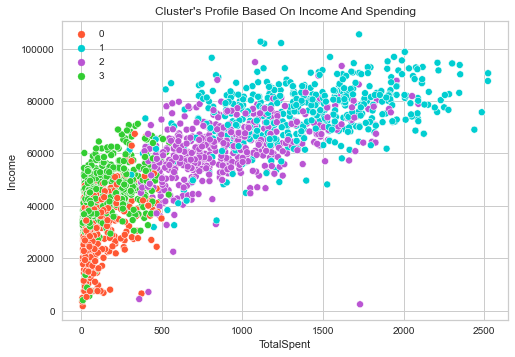

In [35]:
pl = sns.scatterplot(data = df,x=df["TotalSpent"], y=df["Income"],hue=df["Kmeans"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

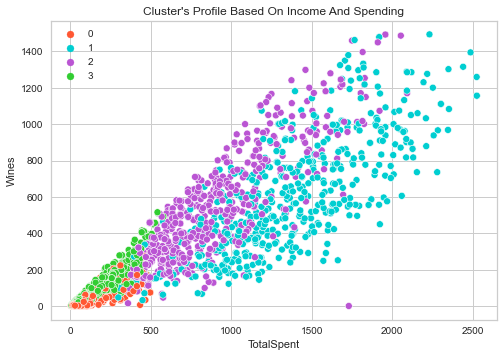

In [36]:
pl = sns.scatterplot(data = df,x=df["TotalSpent"], y=df["Wines"],hue=df["Kmeans"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

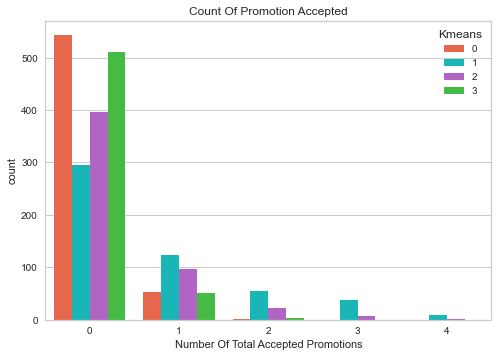

In [37]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Kmeans"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

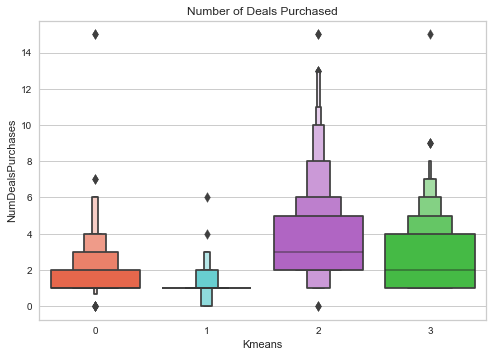

In [38]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Kmeans"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

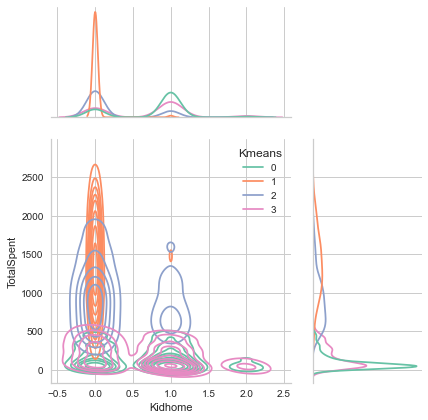

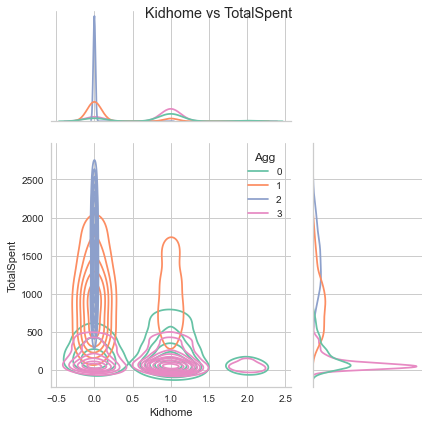

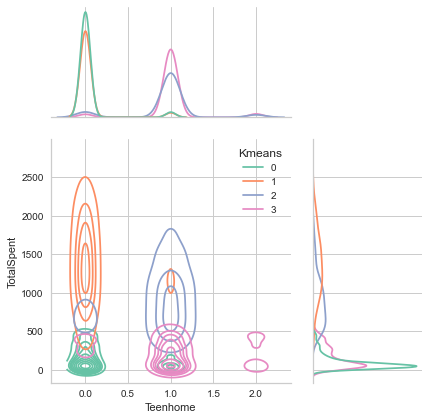

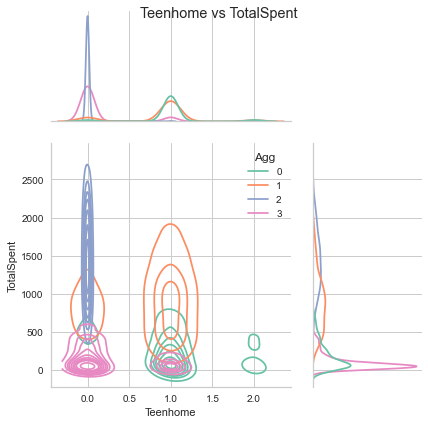

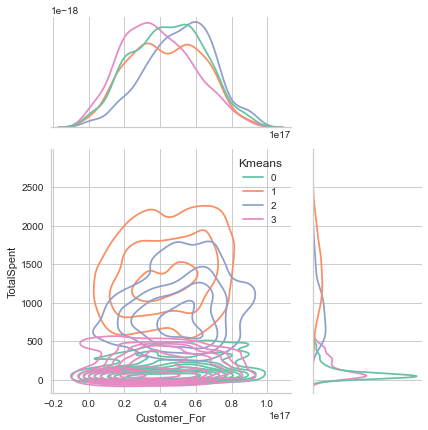

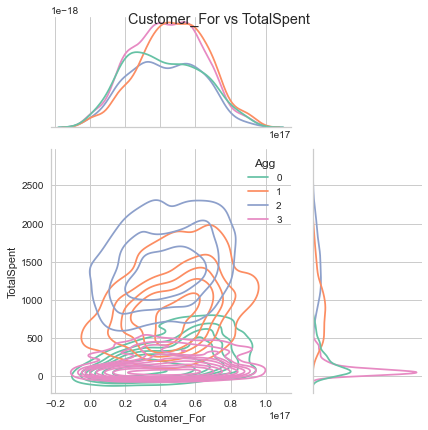

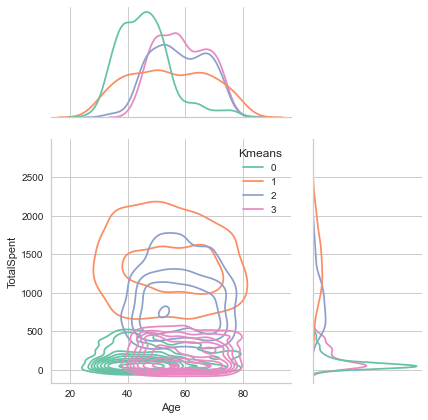

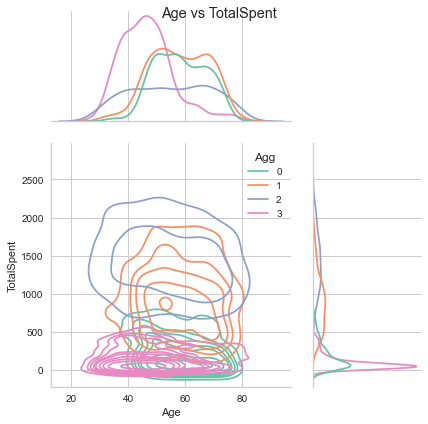

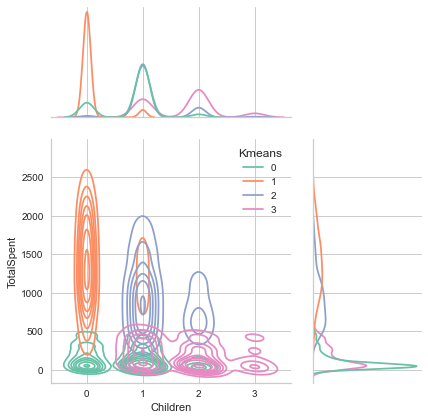

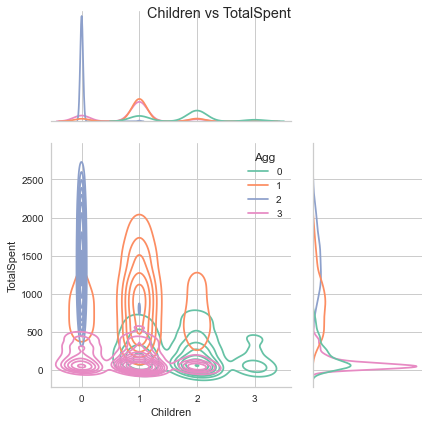

c:\Users\hazir\anaconda3\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


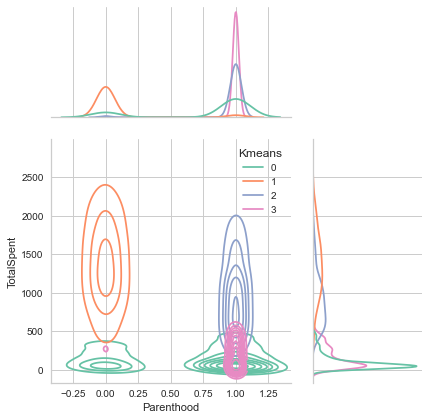

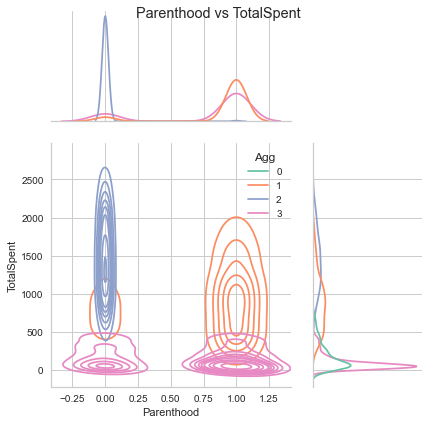

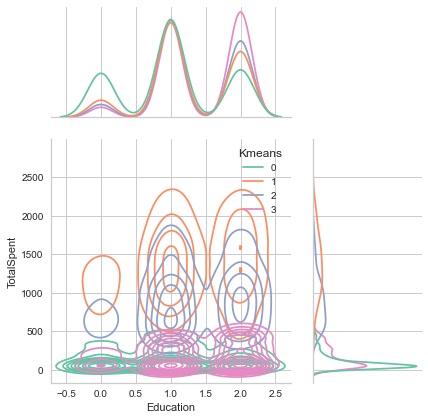

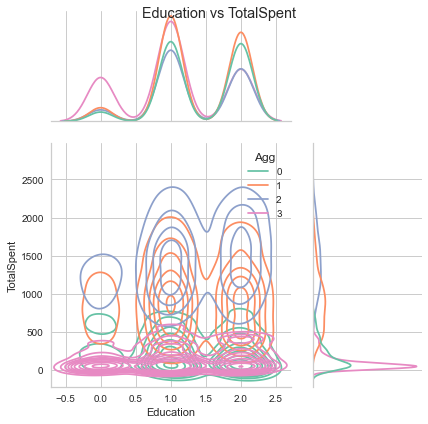

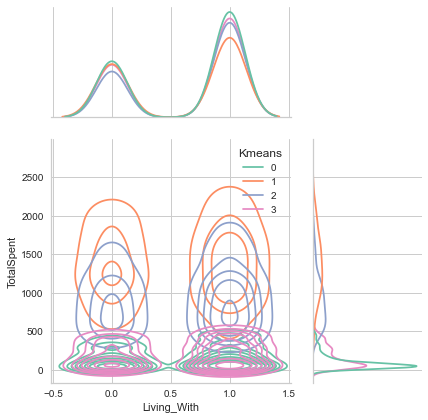

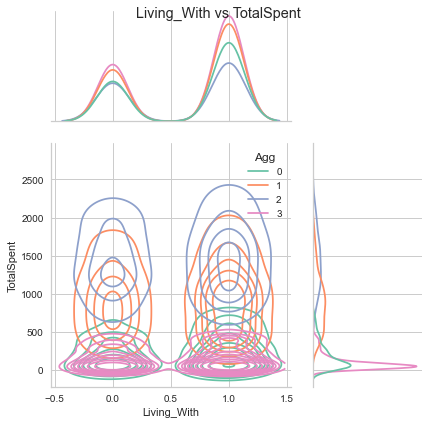

In [39]:

Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Parenthood", "Education", "Living_With"]

for i in Personal:
    sns.jointplot(x=df[i], y=df["TotalSpent"], hue=df["Kmeans"], kind="kde", palette="Set2", height=6, ratio=2)
    sns.jointplot(x=df[i], y=df["TotalSpent"], hue=df["Agg"], kind="kde", palette="Set2", height=6, ratio=2)
    plt.suptitle(f"{i} vs TotalSpent")
    plt.show()



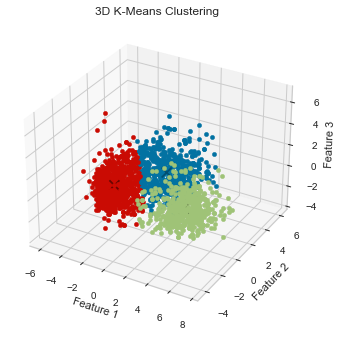

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for i in range(len(transformed_df)):
    ax.scatter(transformed_df.iloc[i,0], transformed_df.iloc[i,1], transformed_df.iloc[i,2], c=colors[kmeans.labels_[i]])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='black')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D K-Means Clustering')
plt.show()

AggLabels
Age is not distinctive feature
Cluster2
Most commonnly they are not parents
Their Spent Values the highest (avg = 1361)
Cluster1
Their Spent Values are the medium (avg= 925)
Clustur0
Slighlty has more undergraduate


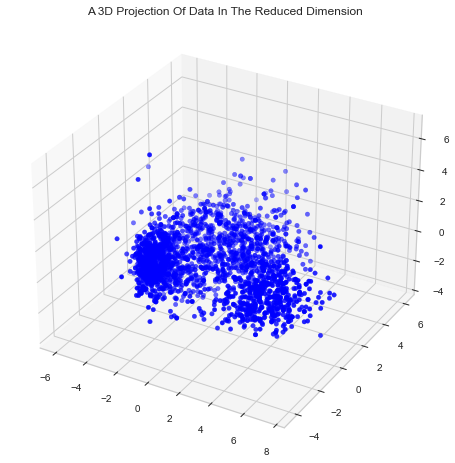

In [51]:
x =transformed_df["Feature1"]
y =transformed_df["Feature2"]
z =transformed_df["Feature3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\clust

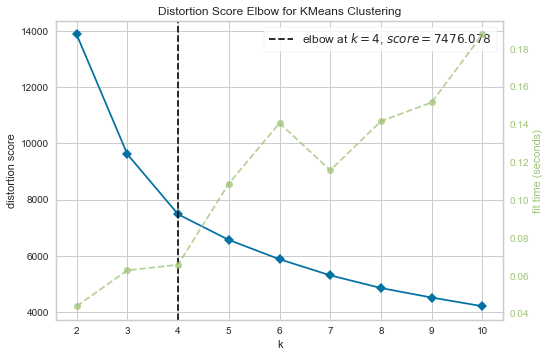

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(transformed_df)
Elbow_M.show()

In [1]:
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])
distance = np.linalg.norm(point1 - point2)

print("The Euclidean distance between", point1, "and", point2, "is", distance)


The Euclidean distance between [1 2 3] and [4 5 6] is 5.196152422706632


In [7]:

import plotly.graph_objs as go
import numpy as np


point1 = [1, 2, 3]
point2 = [4, 5, 6]


distance = np.linalg.norm(np.array(point1) - np.array(point2))


scatter = go.Scatter3d(
    x=[point1[0], point2[0]],
    y=[point1[1], point2[1]],
    z=[point1[2], point2[2]],
    mode='markers',
    marker=dict(
        size=8,
        color='red'
    )
)

line = go.Scatter3d(
    x=[point1[0], point2[0]],
    y=[point1[1], point2[1]],
    z=[point1[2], point2[2]],
    mode='lines',
    line=dict(
        color='blue',
        width=4
    )
)

label = go.Scatter3d(
    x=[(point1[0] + point2[0])/2],
    y=[(point1[1] + point2[1])/2],
    z=[(point1[2] + point2[2])/2],
    text=f'{distance:.2f}',
    mode='text',
    textfont=dict(
        size=16,
        color='black'
    )
)

layout = go.Layout(
    title='Euclidean distance between two 3D points',
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

fig = go.Figure(data=[scatter, line, label], layout=layout)
fig.show()
